# 4 - Classification and Decision Boundaries


Hi guys! Well done for completing the previous worksheet - you're doing amazing, keep up the good work. 

This week we will be talking about something that is key when it comes to classification: **decision boundaries**. But before we jump in, let's just do a quick recap of the story so far. 


## Cats vs dogs: A classification task

![](images/cat-dog2.jpg)

In the last two sessions we have been focused on the problem of predicting whether an animal is a dog or a cat based off of two or more measurements about that animal. In our example, we took:

1. the weight of the animal in kg 
2. the tail length of the animal in cm

Our dataset consisted of many pairs of these measurements, along with a label saying whether this animal is a dog or a cat. Our task was then, given a new pair of measurements: 

> Can we predict whether this new animal is a dog or a cat? 

This type of problem is called a **classification task**. This is because we are trying to predict the *class* (cat or dog) of a new data point. Furthermore, this is a *binary* classification task, because there are only two possible outcomes: cat or dog. 

Before, we looked at the K-nearest neighbours algorithm. In this lesson we won't be going in to detail  about the workings of this algorithm: we covered that in the previous two sessions. All we need to know for the sake of this lesson is

* K-nearest neighbours is a classification algorithm
* Given a training dataset, it can be used to predict whether a new animal is a cat or a dog
* It works by looking at the K (we used 5, but any number is possible in theory) nearest points on a graph of weight vs tail length and uses these to predict the class of the new point. 

## Exercise 1

Run all the code cells below and take a look at the interactive graph. This shows how the k-nearest neighbours algorithm works. Do you remember? If not, feel free to take a look at some of the previous sessions. 


In [38]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2, linewidth=500, threshold=500, suppress=True, edgeitems=5)
%matplotlib notebook

In [39]:
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


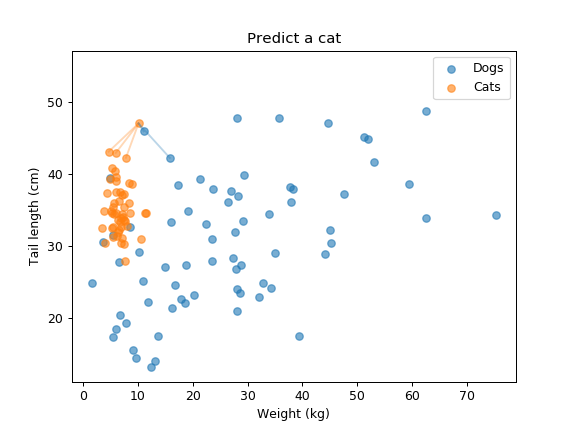

interactive(children=(FloatSlider(value=15.5, description='weight', max=70.0, step=0.01), Output()), _dom_clas…

interactive(children=(FloatSlider(value=47.0, description='tail', max=70.0, min=10.0, step=0.01), Output()), _…

In [40]:
%load_ext autoreload
%autoreload 2

from my_scripts.lesson4 import make_graph_1
make_graph_1()

## Part 1: Decision boundaries

From this interactive plot, you can see that, for every point on the graph we can associate a class. That is, given *any* new pair of measurements of weight and tail length, we can make a prediction: dog, or cat. This new pair of measurements is represented by the sliding point. 

This implies there is some *dividing line* between areas on the graph where we would predict a dog, and areas where we would predict a cat. This line is known as the **decision boundary**. Take a look at the graph below. This shows the decision boundary for the same data. 

<IPython.core.display.Javascript object>


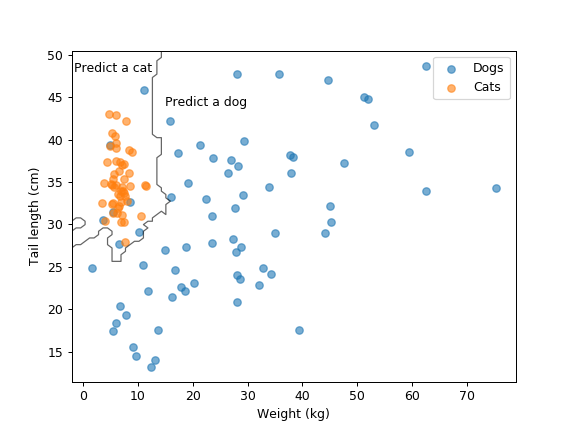

In [41]:
from my_scripts.lesson4 import make_graph_2
make_graph_2()

Anything to the left of this line gets predicted as a cat, and anything to the right gets predicted as a dog. 

As you can see, the decision boundary for the k-nearest neighbours algorithm is actually pretty complicated! It's quite jagged and strange. Let's explore this briefly. 

## Exercise 2

Below you will see some code that looks like this 

```python
plot_decision_boundary(X, y, KNeighborsClassifier(n_neighbors=5))
```

This function, `plot_decision_boundary` takes in one argument. This should be a scikit learn classifier. This is the scikit learn object that's able to fit data and make predictions. Here, we have passed a `KNeighborsClassifier`. But this classifier also takes an argument! The classifier must be told how many (K!) neighbours to consider when making a prediction. 

Your task is this: 

1. try changing the number of neighbours used in the classifier all the way from 1 to 10 
2. What do you notice about the shape of the decision boundary and how it changes?
3. Given this, what number of neighbours would you choose for this data?

<IPython.core.display.Javascript object>


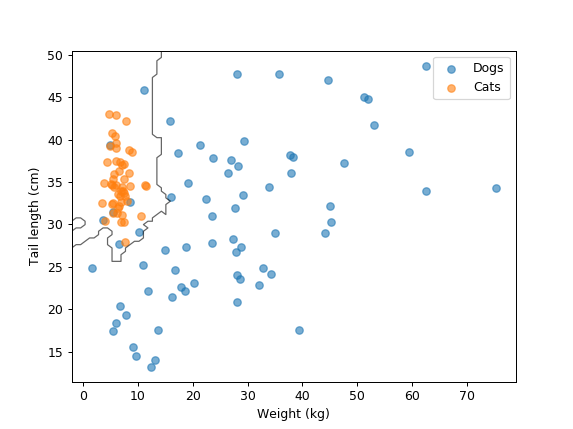

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from my_scripts.lesson4 import plot_decision_boundary

plot_decision_boundary(KNeighborsClassifier(n_neighbors=5))

## The most simple decision boundary: a line

Now the we understand the idea of a decision boundary, the question is: are there more ways of drawing it? The answer is yes! Possibly the most simple decision boundary we could draw is just a straight line. Again, this line represents the *dividing line* between what predictions we make. That means that anything on one side gets predicted as on thing, and anything on the other side gets predicted as the other. 

## Exercise 3

Take a look at the graph below. It shows some new data that is classified into two different groups, like before with the cats and dogs. This time though we don't know exactly what the axes represent: this is just a *general* classification problem with no specific scenario attached to it yet. We will just call the two classes "blue points" and "orange points". 

Your task is to find a decision boundary that separates the two data classes well. 

You can do this by varying the two parameters. They will move the decision boundary around on the graph (the first one adjusts the line height, and the second one adjusts the line angle)

1. Can you find a good decision boundary?
2. Why is your chosen boundary a good one?
3. What does accuracy mean in this case? 


<IPython.core.display.Javascript object>


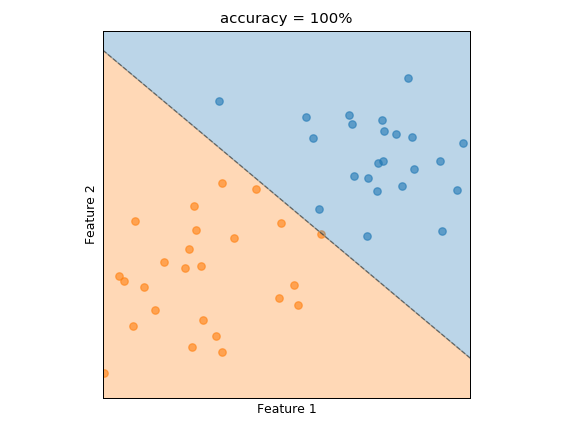

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

In [47]:
from my_scripts.lesson4 import find_best_decision_bondary

find_best_decision_bondary()

In this example we are actually able to fully separate the two classes. But what if we have a more realistic scenario where it's not fully possible to separate them?

## Exercise 4

Try to find the best decision boundary for the data below. 

1. What's the best accuracy you can get? 
2. Why are you not able to get 100% accuracy this time? 
3. Can you think of a way to get better accuracy? What if we could bend the line? Would this be a good idea?  


<IPython.core.display.Javascript object>


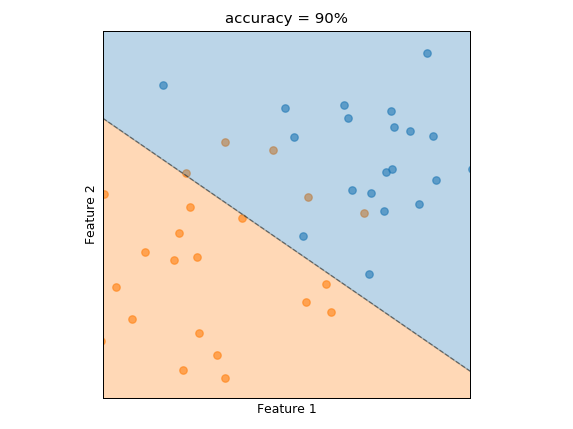

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

In [48]:
from my_scripts.lesson4 import find_best_decision_bondary2

find_best_decision_bondary2()

## Part 2: A probabilistic interpretation

In our work so far we have set the decision boundary which has only two (binary) options: yes or no, dog or cat, blue or orange, true or false. But can we go further?

Take a look at the plot above. There are some regions, like say the bottom left, where we are *pretty sure* that the correct prediction is orange. There are loads of orange points here and no blue, so it makes sense to say this. 

Also, there are regions where we are *pretty sure* that the correct prediction is blue, like the top right. Again, there are loads of blue points here and no orange, so it makes sense to say this. 

However, there is some region in the middle where we can't fully be sure: is could be orange, it could be blue. There are some orange points and some blue points. 

In order to turn this intuition into a more solid mathematical statement, we can use the language of *probability*. Think back to the dog/cat example. Rather than saying 

> "I believe an animal with a weight of 15kg and a tail length of 35cm is a dog"

We say 

> "I believe there is an 80% chance that an animal with a weight of 15kg and a tail length of 35cm is a dog"

Instead of associating every point in our data space with a single prediction, we can associate a *probability*. In our case, maybe something like

> "In the top right, we believe there is a 95% chance that a new point will be blue (and 5% chance it is orange)"

> "In the bottom left, we believe there is a 5% chance that a new point will be blue (and 95% chance it is orange)"

> "Right along the middle line, there is a 50/50 chance of being blue or orange"


But then we could have multiple gradations: as we move further away from the boundary, we become more and more sure that the class is blue (or orange in the other direction). 

Check out the graph below. Here, we have plotted this situation. The more transparent the colour is, the less sure we are about what class it is. 

<IPython.core.display.Javascript object>


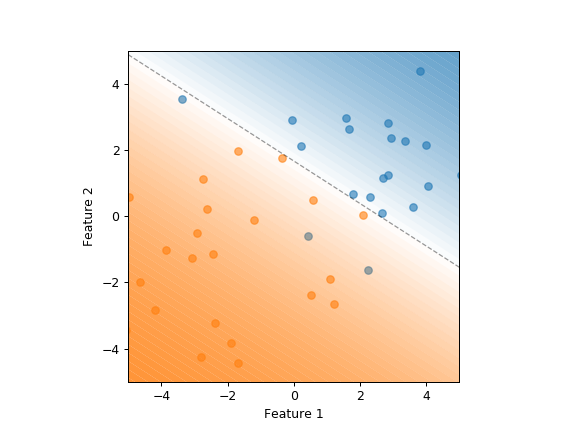

In [49]:
from my_scripts.lesson4 import graded_decision_boundary
  
graded_decision_boundary()

In essence, our new graded decision boundary says

* At the line, the probability of being blue is 0.5
* As we move away from the boundary into the blue territory, the probability of being blue increases. When we're really deep into this area, the probability essentially becomes 1.
* As we move away from the boundary into the orange territory, the probability of being blue decreases. When we're really deep into this area, the probability essentially becomes 0. 


## A new question

That's great, but now we have a new question to answer:

> *How quickly does the probability become 1 as we move into the blue area? Or, equivalently, how quickly does the probability become 0 as we move into the orange area?* 





## Exercise 5

Take a look at the function below. This is called a *sigmoid* function. It has a parameter that can vary the shape. Have a play around with it. 

This is an example of a function we can use to assign a probability to a certain point that's a certain distance away from the boundary. 

Notice that, as the distance gets big in one direction, the probability always gradually goes towards 1. And in the other direction the probability gradually goes towards 0. 

<IPython.core.display.Javascript object>


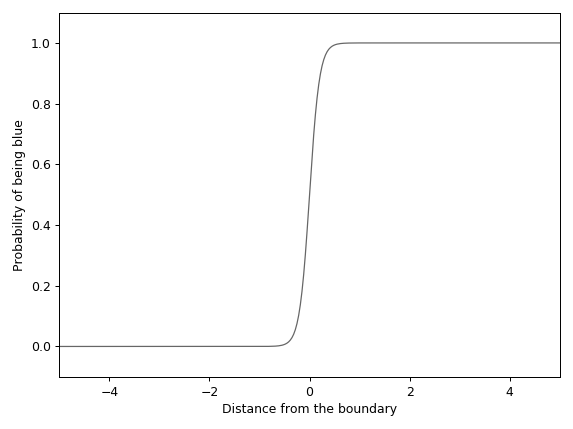

interactive(children=(FloatSlider(value=1.0, description='s', max=10.0, step=0.01), Output()), _dom_classes=('…

In [50]:
from my_scripts.lesson4 import sigmoid

sigmoid()

## Our second algorithm: Logistic Regression

Congratulations! If you've followed all that then you understand our second algorithm for classification. It's called logistic regression. The aim of this algorithm can be stated as follows:

1. Find the best boundary line. 
2. Find the best gradation of the probability

The details of *exactly* how we find the best settings is beyond the scope of this course. Basically, the idea is to *minimise the difference between our probability predictions and our true observed values*. 

Say for a particular point in the data space we say "there is a 70% chance that a data point found here should be blue", but in this spot, we actually *do* find a blue point. Then, our difference will be 0.3. In the same way, say for a particular place we say "there is a 15% chance a point found here is blue", and indeed we find an orange point. Then our difference will be 0.15.  The idea is to do this for all our points, and find the *average difference*. The best setting will be the values of our parameters that has the lowest average difference. 


## Exercise 6

Take a look at the interactive graph below. Try and find the settings of a, b and s that minimise the average difference. 



<IPython.core.display.Javascript object>


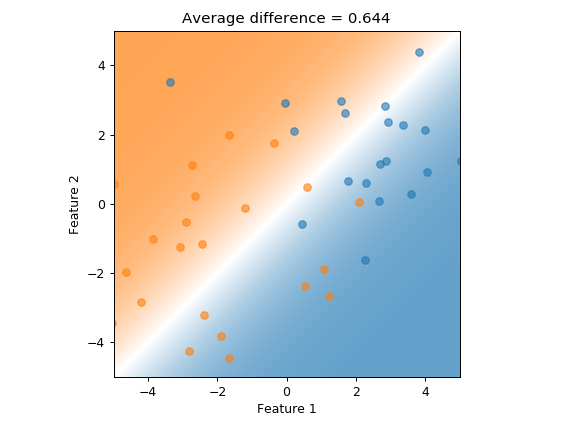

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

interactive(children=(FloatSlider(value=1.0, description='s', max=5.0, min=0.5, step=0.01), Output()), _dom_cl…

In [51]:
from my_scripts.lesson4 import find_best_graded_decision_bondary

find_best_graded_decision_bondary()

## Logistic Regression in Scikit Learn

Scikit learn actually has a built-in logistic regression algorithm that we can use ourselves. This working in exactly the same way as the `KNeighborsClassifier` that we have already used. If you need more of a reminder on how this works, take a look at the previous session. 

Just as before, we import the model from scikit learn, and then initialise a classifier object. 

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

Next, we fit our classifier on the training data

In [68]:
from my_scripts.lesson4 import X, y

classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we're ready to make a prediction! Note that now, we can either make a definite prediction, like so 

In [69]:
classifier.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

or alternatively, we can ask for the probability, like so

In [70]:
classifier.predict_proba(X)[:, 1]

array([0.99, 0.99, 0.98, 0.99, 1.  , 0.87, 0.99, 0.96, 0.82, 0.96, 0.87, 0.99, 0.95, 0.46, 0.99, 0.94, 0.94, 0.97, 0.86, 0.8 , 0.36, 0.99, 1.  , 0.29, 1.  , 0.  , 0.  , 0.  , 0.11, 0.18, 0.  , 0.12, 0.  , 0.  , 0.09, 0.39, 0.56, 0.08, 0.  , 0.05, 0.  , 0.01, 0.  , 0.78, 0.01, 0.02, 0.  , 0.63, 0.  , 0.02])

## That's all folks :P